<a href="https://colab.research.google.com/github/ajdhiman/Google-Colab/blob/main/Basic_Image_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
os.listdir()

['.config', 'car1.jpg', 'sample_data']

In [3]:
img_path='car1.jpg'

In [4]:
car1=mpimg.imread(img_path)

In [5]:
car1.shape

(578, 872, 3)

In [6]:
type(car1)

numpy.ndarray

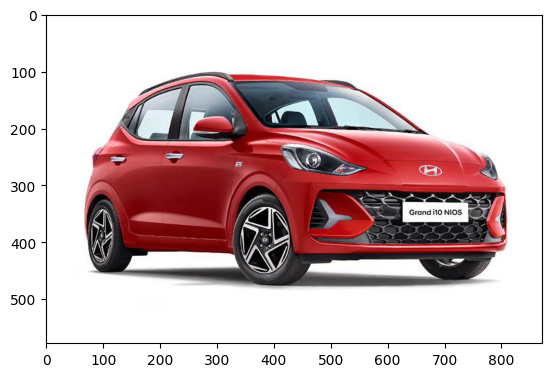

In [7]:
plt.imshow(car1)

In [8]:
car1[0][0] #Pixel Value

array([255, 255, 255], dtype=uint8)

In [9]:
car1_cv=cv2.imread(img_path)

In [10]:
#cv2.imshow("image",car1_cv) #Does not work in colab

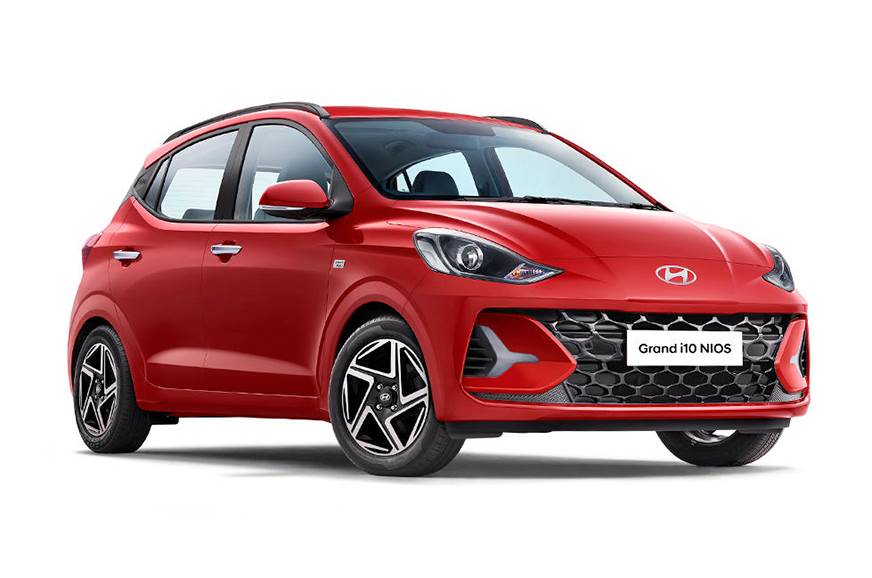

In [11]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv)

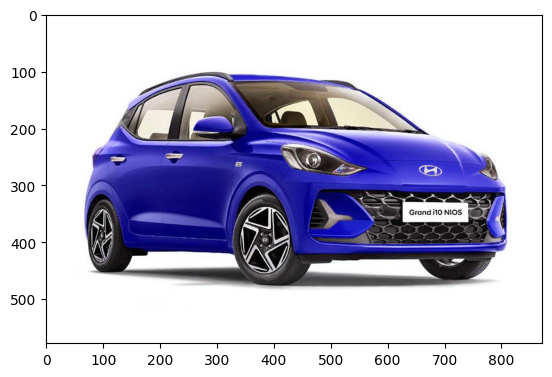

In [12]:
plt.imshow(car1_cv) # CV2 reads images as BGR (Blue,Green and Red), in matplot lib it reads images as RGB

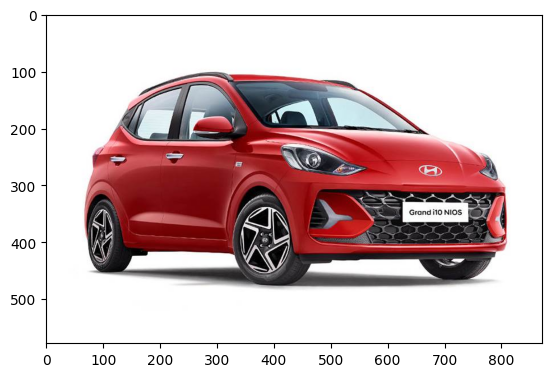

In [13]:
car1_cv2_rgb=cv2.cvtColor(car1_cv,cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_rgb)

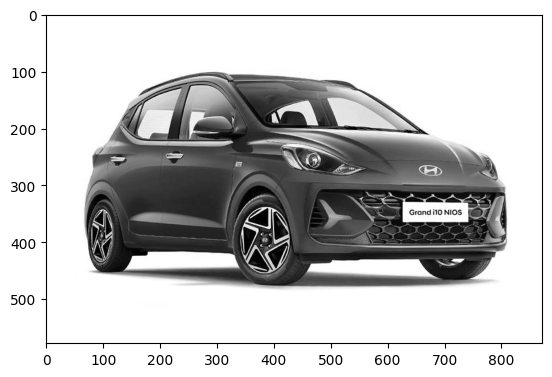

In [14]:
car1_cv2_gray=cv2.cvtColor(car1_cv,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_gray,cmap="gray")

In [15]:
car1_cv2_gray.shape #Contains only 1 channel

(578, 872)

## Understanding composition of colored images

In [16]:
def visualize_rgb_channel(imgArray, figSize=(10,7)):
  B, G, R = cv2.split(imgArray)

  #create zero matrix of shape of image array
  Z= np.zeros(B.shape,dtype=B.dtype)

  #initialize subplots
  fix, ax = plt.subplots(2,2,figsize=figSize)

  #plotting actual image and RGBimage
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Channel Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Channel Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Channel Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))

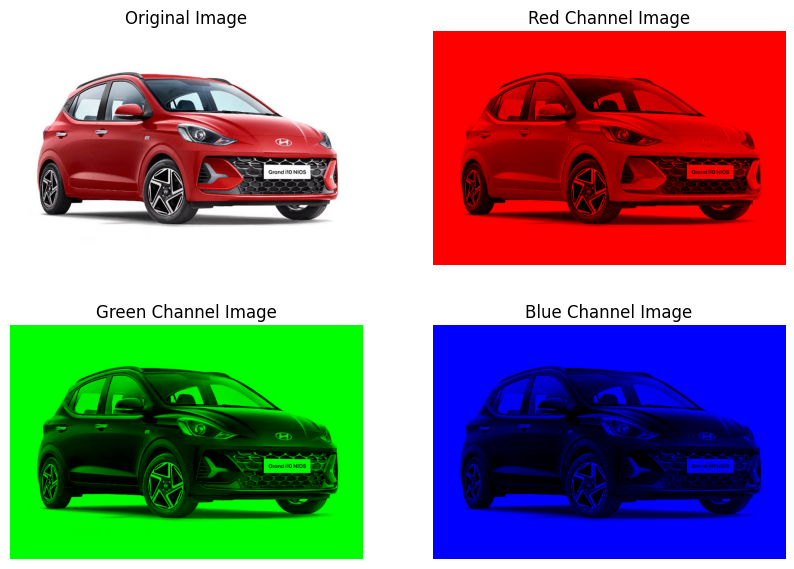

In [17]:
visualize_rgb_channel(car1_cv)

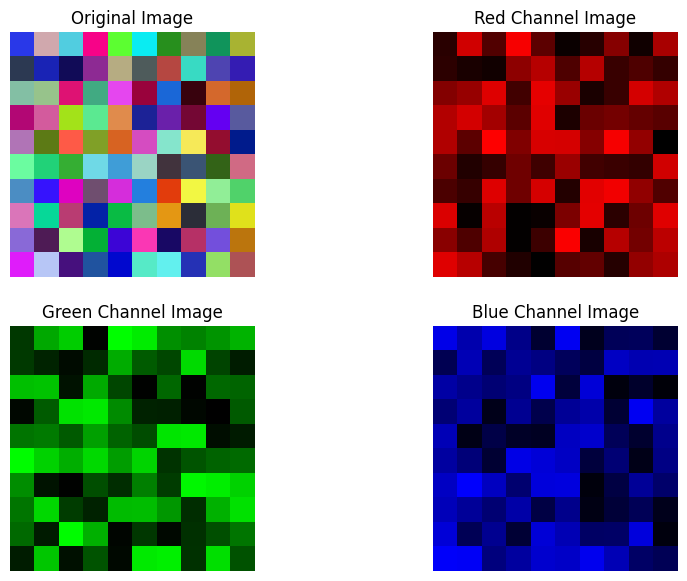

In [18]:
random_image_array=np.random.randint(0,255,(10,10,3))
visualize_rgb_channel(random_image_array)

# Understanding Filters

In [19]:
sobel=np.array([[1,0,-1],
                [2,0,-2],
                [1,0,-1]])

In [20]:
sobel #Sobel Filter for highlighting vertical edges

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [21]:
sobel.T #Sobel^T Filter for highlighting horizontal edges

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [22]:
example_Image=[[0,0,0,0,255,255,255,255,0,0,0,0],
               [0,0,0,0,255,255,255,255,0,0,0,0],
               [0,0,0,0,255,255,255,255,0,0,0,0],
               [0,0,0,0,255,255,255,255,255,255,255,255],
               [0,0,0,0,255,255,255,255,255,255,255,255],
               [0,0,0,0,255,255,255,255,255,255,255,255],
               [0,0,0,0,255,255,255,255,0,0,0,0],
               [0,0,0,0,255,255,255,255,0,0,0,0],
               [0,0,0,0,255,255,255,255,0,0,0,0]]

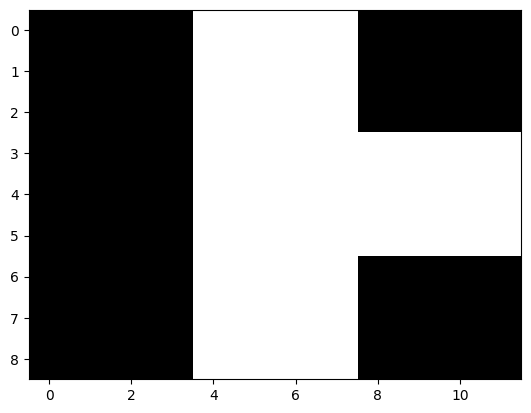

In [23]:
plt.imshow(example_Image,cmap="gray")

In [24]:
def simple_conv(imgFilter=None,pic=None):
  r,c = pic.shape

  k=imgFilter.shape[0]

  temp=list()
  stride=1

  #result image size
  final_r=((r-k)//stride)+1
  final_c=((c-k)//stride)+1

  #take vertical stride across row by row
  for v_stride in range(final_r):
    #take horizontal stride across row by row
    for h_stride in range(final_c):
      target_area_of_pic=pic[v_stride:v_stride+k,h_stride:h_stride+k]
      z=sum(sum(imgFilter*target_area_of_pic))
      temp.append(z)

  result_image=np.array(temp).reshape(final_r,final_c)
  return result_image

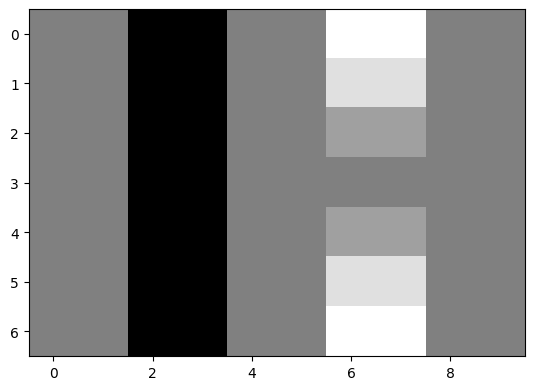

In [25]:
result=simple_conv(imgFilter=sobel,pic=np.array(example_Image))
plt.imshow(result,cmap="gray")

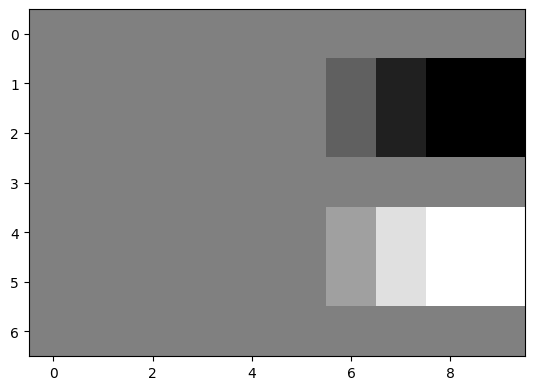

In [26]:
result=simple_conv(imgFilter=sobel.T,pic=np.array(example_Image))
plt.imshow(result,cmap="gray")

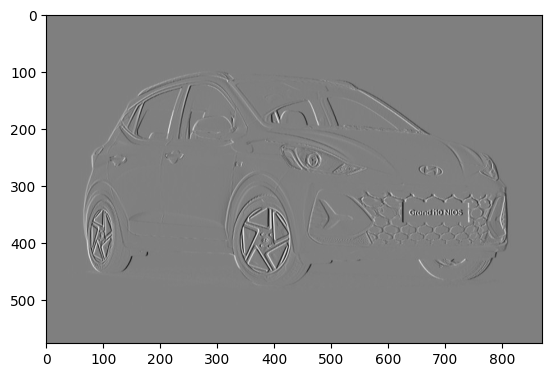

In [27]:
result=simple_conv(imgFilter=sobel,pic=np.array(car1_cv2_gray))
plt.imshow(result,cmap="gray")

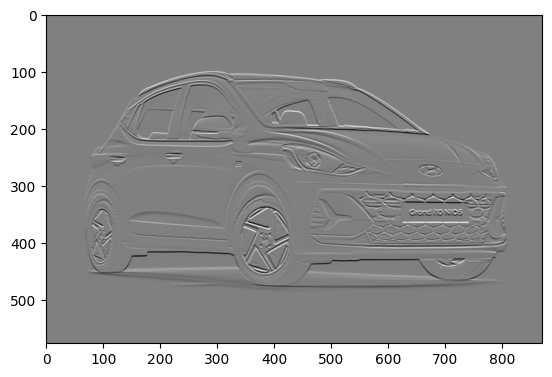

In [28]:
result=simple_conv(imgFilter=sobel.T,pic=np.array(car1_cv2_gray))
plt.imshow(result,cmap="gray")

In [29]:
random_filter =np.random.randn(3,3)
random_filter

array([[ 0.65810198, -0.31048362, -0.37072743],
       [-2.55842021, -1.00936807,  0.71188772],
       [ 0.69788535,  1.27148451, -2.0286068 ]])

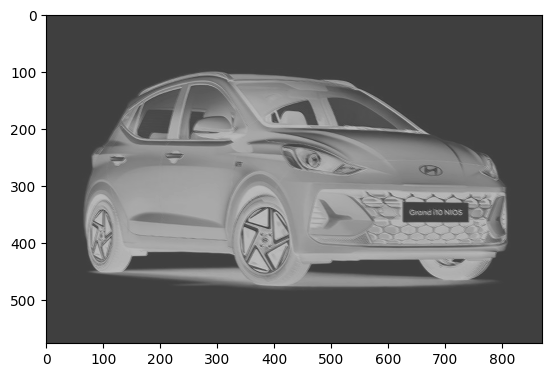

In [30]:
result=simple_conv(imgFilter=random_filter,pic=np.array(car1_cv2_gray))
plt.imshow(result,cmap="gray")